<a href="https://colab.research.google.com/github/ankity7/Computational-Physics/blob/main/PHY425_Day1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Initial value Problem(IVP)
If $x(t)$ is an unknown function of $t$ with $x_0$ as an initial point on it at $t = t_0$, then IVP is written in the form,
$$x\prime= f(t,x) \\
x(t_0)=x_0$$ ,where  $x\prime=\frac{dx(t)}{dt}$ \\
But all IVP are not solvable. Some assumptions have to be made about $f$ and we expect the solution to exist only in the neighborhood of
$t = t_0$.




### First existence theorem ,IVP
### Uniqueness theorem

##Example 1, lec 1

# Euler's method
$x(t+h)=x(t)+hx\prime(t)$


In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(t,x):
  f=-np.sin(t+x)
  return f
def real_sol(t):
  f=-np.arcsin((1-t**2)/(1+t**2))-t
  return f

In [ ]:
#x_0 is x(0),M is number of steps 
#a,b is the limits in which function is defined
#step size h=(b-a)/M
def x_i(x_0,f,M,a,b):
  h=(b-a)/M
  x=np.zeros(M+1)
  t=np.linspace(a,b,M+1)
  x[0]=x_0
  for i in range(1,M+1):
    x[i]=x[i-1]+h*f(t[i-1],x[i-1])
  return x,t

In [ ]:
x_0=-(math.pi)/2
a=0
b=2
h=0.2
M=int((b-a)/h)
(x,t)=x_i(x_0,f,M,a,b)
print(len(x),len(t))
print(len(real_sol(t)))

11 11
11


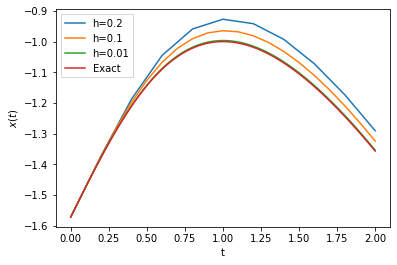

In [ ]:
H=[0.2,0.1,0.01]
ax = plt.subplot()
for h in H:
  M=int((b-a)/h)
  (x,t)=x_i(x_0,f,M,a,b)
  plt.plot(t,x,label=f"h={h}")
  

plt.plot(t,(real_sol(t)),label="Exact")
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(0.8)
plt.show()

### Example 2
$$x\prime= cos(t)-sin(x)+t^2 \\
x(-1)=3$$

### Define the function

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

def f(t,x):
  f=np.cos(t)-np.sin(x)+t**2
  return f


### Take parameters from the question and gererate $t_i$ and $x_i$ using Euler's method

In [ ]:
#x_0 is x(0),M is number of steps 
#a,b is the limits in which function is defined
#step size h=(b-a)/M
def x_i(x_0,f,M,a,b):
  h=(b-a)/M
  x=np.zeros(M+1)
  t=np.linspace(a,b,M+1)
  x[0]=x_0
  for i in range(1,M+1):
    x[i]=x[i-1]+h*f(t[i-1],x[i-1])
  return x,t

In [ ]:
x_0=3
a=-1
b=1
h=0.2
M=int((b-a)/h)
(x,t)=x_i(x_0,f,M,a,b)
print(len(x),len(t))
print(len(real_sol(t)))

11 11
11


###Plot the solution

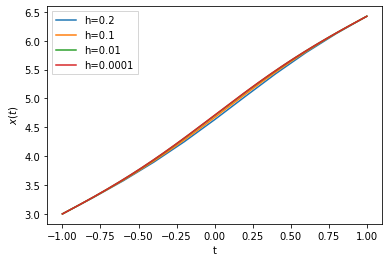

In [ ]:
H=[0.2,0.1,0.01,0.0001]
ax = plt.subplot()
for h in H:
  M=int((b-a)/h)
  (x,t)=x_i(x_0,f,M,a,b)
  plt.plot(t,x,label=f"h={h}")

plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(1)
plt.show()

##Taylor Series Method for the above question

In [ ]:
#define symbolic function and it's higher order derivative
import sympy
from sympy.utilities.lambdify import lambdify
from sympy import *
 
import numpy as np
import math
import matplotlib.pyplot as plt
t, x = symbols('t x')
#dn for nth derivative of x wrt t
dx=sympy.cos(t)-sympy.sin(x)+t**2
x_1=lambdify([t,x],dx)
d2x=Derivative(dx,t).doit()+Derivative(dx,x).doit()*dx
x_2=lambdify([t,x],d2x)
d3x=Derivative(d2x,t).doit()+Derivative(d2x,x).doit()*dx
x_3=lambdify([t,x],d3x)
d4x=Derivative(d3x,t).doit()+Derivative(d3x,x).doit()*dx
x_4=lambdify([t,x],d4x)
print(x_1(1,1))

0.6988313210602433


In [ ]:
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from sympy import *
def Taylor_x_i(x_0,dx,M,a,b):
  
  t, x = symbols('t x')
  x_1=lambdify([t,x],dx)
  d2x=Derivative(dx,t).doit()+Derivative(dx,x).doit()*dx
  x_2=lambdify([t,x],d2x)
  d3x=Derivative(d2x,t).doit()+Derivative(d2x,x).doit()*dx
  x_3=lambdify([t,x],d3x)
  d4x=Derivative(d3x,t).doit()+Derivative(d3x,x).doit()*dx
  x_4=lambdify([t,x],d4x)
  x=np.zeros(M+1)
  t=np.linspace(a,b,M+1)
  x[0]=x_0
  E_4=np.zeros(M+1)
  for i in range(1,M+1):
    x[i]=x[i-1]+h*x_1(t[i-1],x[i-1])+((h**2)/2)*x_2(t[i-1],x[i-1])+((h**3)/6)*x_3(t[i-1],x[i-1])+((h**4)/24)*x_4(t[i-1],x[i-1])
    E_4[i]=((h**4)/120)*(x_4(t[i],x[i])-x_4(t[i-1],x[i-1]))
  return (t,x,E_4)

10
20
200


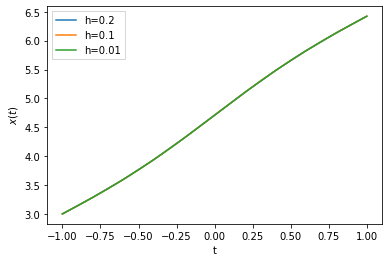

In [ ]:
x_0=3
a=-1
b=1
H=[0.2,0.1,0.01]
ax = plt.subplot()

T=[]
X=[]
for h in H:
 
  M=int((b-a)/h)
  print(M)
  (t,x,E)=Taylor_x_i(x_0,dx,M,a,b)
  plt.plot(t,x,'-',label=f"h={h}")
 
  T.append(t)
  X.append(x)
 
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(1)
plt.show()

In [ ]:

X[0]

array([3.        , 3.28688473, 3.59674629, 3.9388549 , 4.31365158,
       4.70958088, 5.10568817, 5.48099864, 5.82383095, 6.13443596,
       6.42196169])

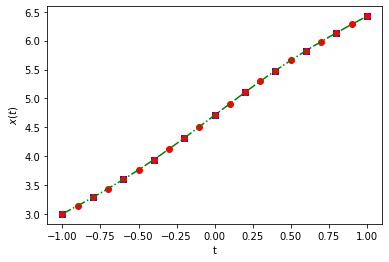

In [ ]:
plt.plot(T[0], X[0], 'bs', T[1], X[1], 'ro', T[2], X[2], 'g-.')
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
#leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
plt.show()

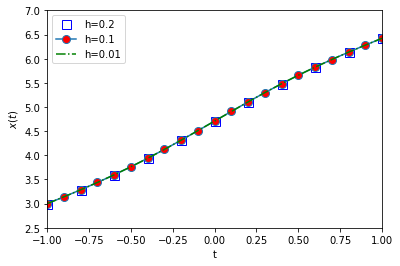

In [ ]:

plt.plot(T[0], X[0], 'bs', markerfacecolor='none',markersize=9,label=f"h={H[0]}")
plt.plot( T[1], X[1],  marker='o',markerfacecolor='red', 
         markersize=8,  label=f"h={H[1]}")
plt.plot( T[2], X[2], 'g-.',label=f"h={H[2]}")
plt.axis([-1, 1, 2.5, 7])
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
plt.show()

##Delay Differential Equations

In [ ]:
#define symbolic function and it's higher order derivative
import sympy
from sympy.utilities.lambdify import lambdify
from sympy import *
import numpy as np
import math
import matplotlib.pyplot as plt
t= symbols('t')
#dn for nth derivative of x wrt t
x=((t-1)**3)/3+1/3
x_=lambdify([t],x)
dx=(t-1)**2
x_1=lambdify([t],dx)
d2x=Derivative(dx,t).doit()
x_2=lambdify([t],d2x)
d3x=Derivative(d2x,t).doit()
x_3=lambdify([t],d3x)
a=1
print(float(x_(0)))

-3.3306690738754696e-16


In [ ]:
def Taylor_delayed_x_i(x_0,dx,M,a,b):
  t= symbols('t')
  
  x_1=lambdify([t],dx)
  d2x=Derivative(dx,t).doit()
  x_2=lambdify([t],d2x)
  d3x=Derivative(d2x,t).doit()
  x_3=lambdify([t],d3x)
  X=np.zeros(M+1)
  T=np.linspace(a,b,M+1)
  E_3=np.zeros(M+1)
  X[0]=x_0
  for i in range(1,M+1):
    X[i]=X[i-1]+h*x_1(T[i-1])+((h**2)/2)*x_2(T[i-1])+((h**3)/6)*x_3(T[i-1])
    E_3[i]=((h**3)/24)*(x_3(T[i])-x_3(T[i-1]))
  return (T,X,E_3)

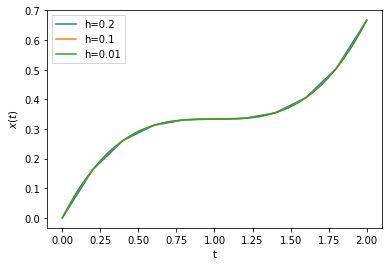

In [ ]:
a=0
b=2
x_0=x_(0)
H=[0.2,0.1,0.01]
ax = plt.subplot()

T=[]
X=[]
for h in H:
 
  M=int((b-a)/h)
  #print(M)
  (t,x,E)=Taylor_delayed_x_i(x_0,dx,M,a,b)
  plt.plot(t,x,'-',label=f"h={h}")
 
  T.append(t)
  X.append(x)
 
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(1)
plt.show()


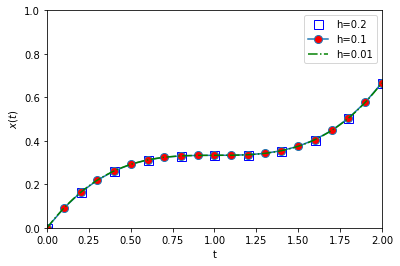

In [ ]:
plt.plot(T[0], X[0], 'bs', markerfacecolor='none',markersize=9,label=f"h={H[0]}")
plt.plot( T[1], X[1],  marker='o',markerfacecolor='red', 
         markersize=8,  label=f"h={H[1]}")
plt.plot( T[2], X[2], 'g-.',label=f"h={H[2]}")
plt.axis([0, 2, 0, 1])
plt.legend()
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
plt.show()

##IVP can be used to compute a definite integral.

In [ ]:
#define symbolic function and it's higher order derivative
import sympy
from sympy.utilities.lambdify import lambdify
from sympy import *
 
import numpy as np
import math
import matplotlib.pyplot as plt
t = symbols('t')
#dn for nth derivative of x wrt t
dx=sympy.exp(-t**2)
x_1=lambdify([t],dx)
d2x=Derivative(dx,t).doit()
x_2=lambdify([t],d2x)
d3x=Derivative(d2x,t).doit()
x_3=lambdify([t],d3x)
d4x=Derivative(d3x,t).doit()
x_4=lambdify([t],d4x)
print(x_1(1))

0.36787944117144233


In [ ]:
import sympy
import numpy as np
from sympy.utilities.lambdify import lambdify
from sympy import *
def Taylor_erf(x_0,dx,M,a,b):
  t = symbols('t')
  #dn for nth derivative of x wrt t
  x_1=lambdify([t],dx)
  d2x=Derivative(dx,t).doit()
  x_2=lambdify([t],d2x)
  d3x=Derivative(d2x,t).doit()
  x_3=lambdify([t],d3x)
  d4x=Derivative(d3x,t).doit()
  x_4=lambdify([t],d4x)
  x=np.zeros(M+1)
  T=np.linspace(a,b,M+1)
  x[0]=x_0
  E_4=np.zeros(M+1)
  for i in range(1,M+1):
    x[i]=x[i-1]+h*x_1(T[i-1])+((h**2)/2)*x_2(T[i-1])+((h**3)/6)*x_3(T[i-1])+((h**4)/24)*x_4(T[i-1])
    E_4[i]=((h**4)/120)*(x_4(T[i])-x_4(T[i-1]))
  return (T,x,E_4)

exp(-t**2) 0 0 2
10
20
200


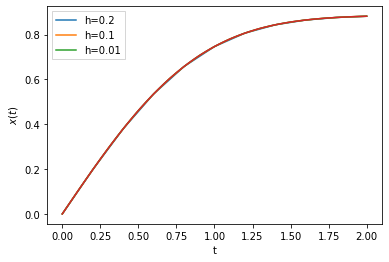

In [ ]:
x_0=0
a=0
b=2
H=[0.2,0.1,0.01]
ax = plt.subplot()
print(dx,x_0,a,b)
T=[]
X=[]
for h in H:
 
  M=int((b-a)/h)
  print(M)
  (t,x,E)=Taylor_erf(x_0,dx,M,a,b)
  plt.plot(t,x,'-',label=f"h={h}")
  T.append(t)
  X.append(x)
#print(x)
plt.plot(l,np.array(er))
plt.xlabel("t")
plt.ylabel(r"$x(t)$")
leg = plt.legend(loc='best', ncol=1, shadow=False, fancybox=False)
#leg.get_frame().set_alpha(1)
plt.show()

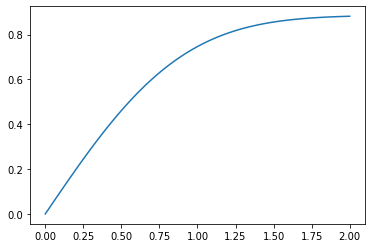

In [ ]:
import math
l=np.linspace(a,b,100)
er=[]
for i in l:
  er.append((np.sqrt(np.pi)/2)*(math.erf(i)))
plt.plot(l,np.array(er))

In [ ]:
2/

0.6366197723675814

In [ ]:
math.pi

3.141592653589793